# Trial to Paid Classification Feature Importance
The objectvie of this machine learning project was to help a CRM company's marketing team to identify customers that are likely to convert from trial subsciption plan to paying subscription plan. To tackle the challenge, I developed a binary classification model with AWS SageMaker that predicts whether a customer converts to paying subscription plan. 

In this notebook, I am analysing feature importances.

Note: datasets for this project are not publicly available.

In [15]:
import shap
import boto3
import tarfile
import xgboost
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt


user = '<username>'
bucket = '<bucketname>'
project_path = '<projectpath>'
training_job_name = 'trainingjobname>'

key = f'''{user}/{project_path}/output/{training_job_name}/output/model.tar.gz'''

# Downloading xgboost model to the current path  
boto3.resource('s3').Bucket(bucket).download_file(key, 'model.tar.gz') 

In [16]:
# Retreiving a model that I built in classification_model notebook
t = tarfile.open('model.tar.gz', 'r:gz')
t.extractall() 

model_file_path = '<MODELPATH>'

# Saving and retreiving machine learning models
model = pkl.load(open(model_file_path, 'rb')) 

pprint(vars(model))

{'best_iteration': 79,
 'best_ntree_limit': 80,
 'booster': 'gbtree',
 'feature_names': ['f0',
                   'f1',
                   'f2',
                   'f3',
                   'f4',
                   'f5',
                   'f6',
                   'f7',
                   'f8',
                   'f9',
                   'f10',
                   'f11',
                   'f12',
                   'f13',
                   'f14',
                   'f15',
                   'f16',
                   'f17',
                   'f18',
                   'f19',
                   'f20',
                   'f21',
                   'f22',
                   'f23',
                   'f24',
                   'f25',
                   'f26',
                   'f27',
                   'f28',
                   'f29',
                   'f30',
                   'f31',
                   'f32',
                   'f33',
                   'f34',
                   'f35',
    

## Expaling classification_model Using SHAP

In [1]:
# Extracting train dataset
train_path=f'''s3://{bucket}/{user}/{project_path}/input/train.csv'''

print(train_path)
train_df = pd.read_csv(train_path)

train_df.head(10)

NameError: name 'bucket' is not defined

In [18]:
columns = ['flag_converted', 'total_users',
       'typ_event_activity_added', 'segment_veroemail_opened',
       'typ_event_person_added', 'segment_stage_added',
       'typ_event_pipeline_view_opened', 'segment_veroemail_unsubscribed',
       'segment_stage_updated', 'typ_event_email_sent', 'typ_event_deal_added',
       'segment_user_logged_in', 'typ_event_deal_won',
       'typ_events_overall_activity', 'typ_event_lead_added', 'unique_users',
       'vistis', 'avg_lenght_seconds', 'blogpageload_count',
       'wwwpageload_count', 'apppageload_count', 'webapppageload_count',
       'supportpageload_count', 'flag_promocode_no', 'flag_promocode_yes',
       'billingdetails_entered_no', 'billingdetails_entered_yes',
       'key_country_AU', 'key_country_BR', 'key_country_CA', 'key_country_CL',
       'key_country_DE', 'key_country_EE', 'key_country_ES', 'key_country_FR',
       'key_country_GB', 'key_country_IN', 'key_country_MX', 'key_country_NL',
       'key_country_PL', 'key_country_RU', 'key_country_US', 'key_country_ZA',
       'key_country_other', 'day_name_of_week_Friday',
       'day_name_of_week_Monday', 'day_name_of_week_Saturday',
       'day_name_of_week_Sunday', 'day_name_of_week_Thursday',
       'day_name_of_week_Tuesday', 'day_name_of_week_Wednesday',
       'industry_construction', 'industry_consulting',
       'industry_creative agency (web, advertising, video)',
       'industry_education and training',
       'industry_financial or credit services', 'industry_health',
       'industry_it services', 'industry_manufacturing',
       'industry_news, media and publications', 'industry_not inserted',
       'industry_other', 'industry_real estate',
       'industry_software, app development', 'industry_tech startup',
       'industry_trade (retail, wholesale)', 'email_domain_disposable_domain',
       'email_domain_private_domain', 'email_domain_public_email_domain',
       'flag_clearbit_success_0', 'flag_clearbit_success_1',
       'typ_flag_search_0', 'typ_flag_search_1', 'typ_flag_billing_0',
       'typ_flag_billing_1', 'typ_flag_pipeline_customization_0',
       'typ_flag_pipeline_customization_1',
       'typ_flag_organization_details_opened_0',
       'typ_flag_organization_details_opened_1', 'typ_flag_filters_0',
       'typ_flag_filters_1', 'typ_flag_deal_list_opened_0',
       'typ_flag_deal_list_opened_1', 'typ_flag_calendar_sync_enabled_0',
       'typ_flag_calendar_sync_enabled_1', 'typ_flag_activity_list_opened_0',
       'typ_flag_activity_list_opened_1', 'typ_flag_lead_details_opened_0',
       'typ_flag_lead_details_opened_1', 'typ_flag_import_0',
       'typ_flag_import_1', 'typ_flag_insights_0', 'typ_flag_insights_1',
       'typ_flag_email_sync_enabled_0', 'typ_flag_email_sync_enabled_1',
       'typ_flag_custom_fields_0', 'typ_flag_custom_fields_1']

df = pd.read_csv(train_path, names=columns)

y = df['flag_converted']

X = df.drop('flag_converted', axis=1)

X.head(3)

,total_users,typ_event_activity_added,segment_veroemail_opened,typ_event_person_added,segment_stage_added,typ_event_pipeline_view_opened,segment_veroemail_unsubscribed,segment_stage_updated,typ_event_email_sent,typ_event_deal_added,...,typ_flag_lead_details_opened_0,typ_flag_lead_details_opened_1,typ_flag_import_0,typ_flag_import_1,typ_flag_insights_0,typ_flag_insights_1,typ_flag_email_sync_enabled_0,typ_flag_email_sync_enabled_1,typ_flag_custom_fields_0,typ_flag_custom_fields_1
0,1,0,1,12,13,62,0,20,2,12,...,1,0,1,0,0,1,0,1,0,1
1,1,0,3,1,0,1,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,1,0,0,0,0,4,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [20]:
# Producing shap values of  my classification model
explainer = shap.Explainer(model)
shap_values = explainer(X)

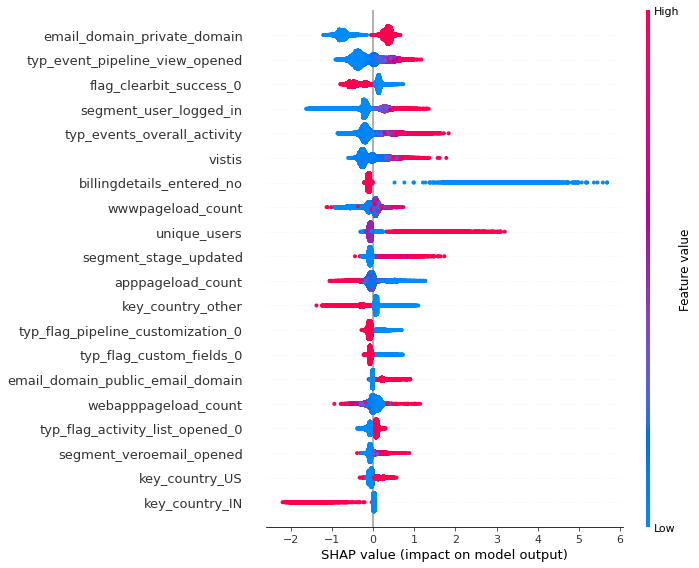

In [29]:
# Summarising the effects of all the features
shap.summary_plot(shap_values) 

# Note: SHAP values represent a feature's responsibility for a change in the model output

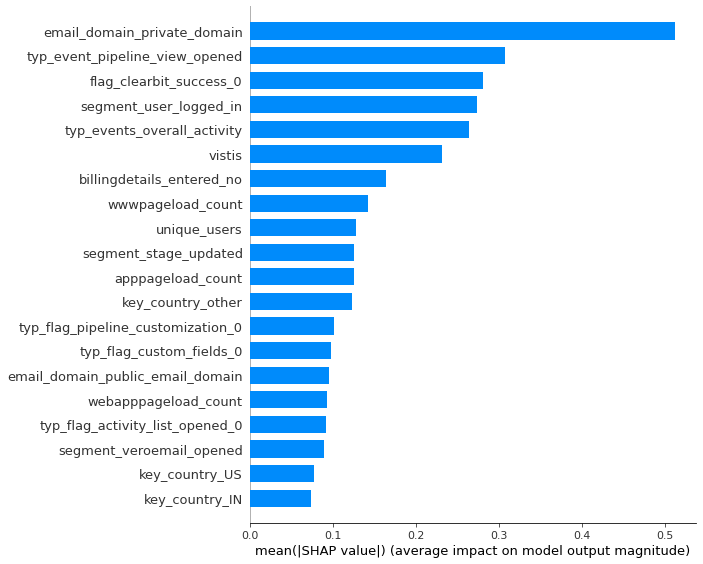

In [22]:
shap.summary_plot(shap_values, X, plot_type="bar") ### Does that show the feature importance for predicting accurate results?